In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('/kaggle/input/playground-series-s3e15/data.csv')
data.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


Let's check the standard values, and start processing like missing values, outliers, etc.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31644 entries, 0 to 31643
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   31644 non-null  int64  
 1   author               26620 non-null  object 
 2   geometry             26144 non-null  object 
 3   pressure [MPa]       27192 non-null  float64
 4   mass_flux [kg/m2-s]  26853 non-null  float64
 5   x_e_out [-]          21229 non-null  float64
 6   D_e [mm]             26156 non-null  float64
 7   D_h [mm]             27055 non-null  float64
 8   length [mm]          26885 non-null  float64
 9   chf_exp [MW/m2]      31644 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.4+ MB


In [4]:
data.describe()

,id,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
count,31644.000000,27192.000000,26853.000000,21229.000000,26156.000000,27055.000000,26885.000000,31644.000000
mean,15821.500000,10.640747,3068.011023,-0.000453,8.629255,14.174330,832.987391,3.796985
std,9134.980296,4.333683,1777.032080,0.100911,5.185692,19.838489,672.299239,1.983991
min,0.000000,0.100000,0.000000,-0.866700,1.000000,1.000000,10.000000,0.800000
25%,7910.750000,6.890000,1519.000000,-0.046600,5.000000,5.600000,318.000000,2.400000
50%,15821.500000,11.070000,2731.000000,0.003800,7.800000,10.000000,610.000000,3.400000
75%,23732.250000,13.790000,4069.000000,0.064800,10.800000,11.500000,914.000000,4.600000
max,31643.000000,20.680000,7975.000000,0.232000,37.500000,120.000000,3048.000000,19.300000


In [5]:
data.isnull().sum()

id                         0
author                  5024
geometry                5500
pressure [MPa]          4452
mass_flux [kg/m2-s]     4791
x_e_out [-]            10415
D_e [mm]                5488
D_h [mm]                4589
length [mm]             4759
chf_exp [MW/m2]            0
dtype: int64

I will rename the columns

In [6]:
data = data.rename(columns={'pressure [MPa]':'pressure',
                           'mass_flux [kg/m2-s]':'mass_flux',
                           'x_e_out [-]':'x_e_out',
                           'D_e [mm]':'D_e',
                           'D_h [mm]':'D_h',
                           'length [mm]':'length',
                           'chf_exp [MW/m2]':'chf_exp'})
data.head()

,id,author,geometry,pressure,mass_flux,x_e_out,D_e,D_h,length,chf_exp
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


I will divide the data into training and test data 

In [7]:
data = data.drop('id', axis = 1)

In [8]:
train = data[~data.x_e_out.isnull()]
test = data[data.x_e_out.isnull()]

In [9]:
train.head()

,author,geometry,pressure,mass_flux,x_e_out,D_e,D_h,length,chf_exp
0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
5,NaN,NaN,17.24,3648.0,-0.0711,NaN,1.9,696.0,3.6


In [10]:
test.head()

,author,geometry,pressure,mass_flux,x_e_out,D_e,D_h,length,chf_exp
4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
7,Peskov,tube,18.00,750.0,NaN,10.0,10.0,1650.0,2.2
10,Thompson,tube,NaN,NaN,NaN,1.9,1.9,152.0,3.2
12,Thompson,NaN,6.89,7500.0,NaN,NaN,12.8,1930.0,4.8
23,Beus,annulus,15.51,1355.0,NaN,5.6,15.2,2134.0,2.1


In [11]:
train_no = train.drop('x_e_out', axis = 1)
train_no_copy = train_no.copy()

Now let's convert the data, i.e. let's encode two columns (author, geometry) , and work with the missing values with KNNImpter

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer 

In [13]:
train_copy = train.copy()
test_cop = test.copy()

In [14]:
def encoder(df):
    category_encoder = df[df.columns[:2]]
    le = LabelEncoder()
    for i in category_encoder:
        df[i]=le.fit_transform(df[i])
    return df

In [15]:
encoder(train_copy)

,author,geometry,pressure,mass_flux,x_e_out,D_e,D_h,length,chf_exp
0,7,2,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,7,2,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,7,3,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,0,0,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
5,10,3,17.24,3648.0,-0.0711,NaN,1.9,696.0,3.6
...,...,...,...,...,...,...,...,...,...
31636,10,3,12.07,NaN,-0.0195,NaN,1.9,152.0,5.4
31638,7,2,NaN,3648.0,-0.0487,4.7,4.7,318.0,9.0
31639,7,3,NaN,1736.0,0.0886,NaN,7.8,591.0,2.3
31641,7,3,18.27,658.0,-0.1224,3.0,3.0,150.0,2.3


In [16]:
encoder(test_cop)

,author,geometry,pressure,mass_flux,x_e_out,D_e,D_h,length,chf_exp
4,10,2,13.79,686.0,NaN,11.1,11.1,457.0,2.8
7,5,2,18.00,750.0,NaN,10.0,10.0,1650.0,2.2
10,7,2,NaN,NaN,NaN,1.9,1.9,152.0,3.2
12,7,3,6.89,7500.0,NaN,NaN,12.8,1930.0,4.8
23,0,0,15.51,1355.0,NaN,5.6,15.2,2134.0,2.1
...,...,...,...,...,...,...,...,...,...
31633,7,2,11.03,NaN,NaN,11.5,11.5,NaN,2.0
31634,6,1,1.01,2000.0,NaN,15.0,120.0,10.0,6.2
31637,8,2,13.79,688.0,NaN,NaN,11.1,457.0,2.3
31640,10,3,13.79,NaN,NaN,4.7,4.7,NaN,3.9


In [17]:
mis = train_copy.columns[2:-1]
knn = KNNImputer(n_neighbors = 6)
train_copy[mis] = knn.fit_transform(train_copy[mis])

In [18]:
train_copy.isnull().sum()

author       0
geometry     0
pressure     0
mass_flux    0
x_e_out      0
D_e          0
D_h          0
length       0
chf_exp      0
dtype: int64

In [19]:
knn = KNNImputer(n_neighbors = 6)
test_cop = knn.fit_transform(test_cop)

In [20]:
train = train_copy
test = test_cop

Check duplicates and delete them

In [21]:
train.duplicated().sum()

10

In [22]:
train = train.drop_duplicates()

Further check the emissions

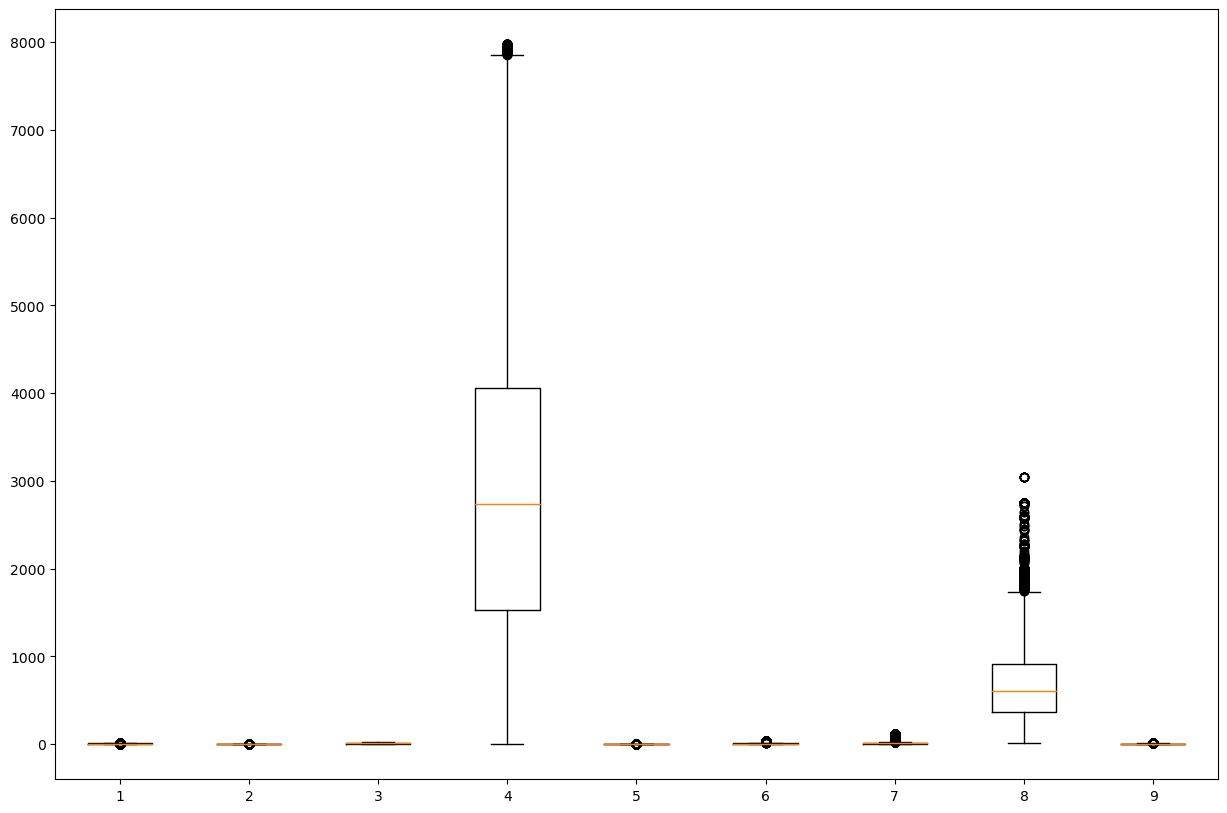

In [23]:
plt.figure(figsize=(15, 10))
plt.boxplot(train)
plt.show()

As you can see the emissions are present, and somewhere even a lot of them

In [24]:
from scipy import stats
z = stats.zscore(train)
z.head()

,author,geometry,pressure,mass_flux,x_e_out,D_e,D_h,length,chf_exp
0,0.125438,0.145463,-0.863164,0.413061,1.742593,0.445398,-0.178094,-0.607305,-0.105472
1,0.125438,0.145463,-1.159548,1.741351,-0.407559,0.344869,-0.203497,-0.101732,1.202243
2,0.125438,1.308459,0.738247,-0.598748,0.336572,-0.177884,-0.335591,-0.569004,-0.658735
3,-2.618559,-2.180527,0.738247,0.360022,-0.271812,-0.600107,0.045450,2.000226,-0.407252
5,1.301437,1.308459,1.551925,0.341954,-0.699860,-1.344023,-0.630263,-0.202847,-0.105472


In [25]:
z_mask = (np.abs(z) < 2).all(axis = 1)

train_z = train[z_mask]
train_z.shape

(14395, 9)

In [26]:
train.shape

(21219, 9)

There were practically 10,000 or so emissions. We did well with that. Now let's do the same with the test set

In [27]:
z_test = stats.zscore(test)

z_mask_test = (np.abs(z_test) < 2).all(axis = 1)
test_z = test[z_mask_test]
test_z.shape

(7428, 8)

In [28]:
test.shape

(10415, 8)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = train.drop('x_e_out', axis = 1)
y = train[['x_e_out']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
import optuna 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
def obj(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.1, 0.99)
    gamma = trial.suggest_int('gamma', 1, 15)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    max_leaves = trial.suggest_int('max_leaves', 1, 15)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 20)
    subsample = trial.suggest_float('subsample', 0.1, 0.99)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 0.99)
    model = XGBRegressor(
        learning_rate = learning_rate,
        gamma = gamma,
        max_depth = max_depth,
        booster = 'gbtree',
        min_child_weight = min_child_weight,
        subsample = subsample,
        colsample_bytree = colsample_bytree,
        n_jobs = -1
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

In [34]:
study = optuna.create_study(direction='maximize')
study.optimize(obj, n_trials = 100)

[I 2023-06-29 13:26:28,205] A new study created in memory with name: no-name-7c811870-afe6-4455-a490-c8cbb1e8383d
[I 2023-06-29 13:26:30,559] Trial 0 finished with value: 0.007348475369708309 and parameters: {'learning_rate': 0.5286974227292022, 'gamma': 7, 'max_depth': 14, 'max_leaves': 11, 'min_child_weight': 14, 'subsample': 0.6993583275355623, 'colsample_bytree': 0.8421841021550351}. Best is trial 0 with value: 0.007348475369708309.
[I 2023-06-29 13:26:32,091] Trial 1 finished with value: 0.008753077217534447 and parameters: {'learning_rate': 0.3162354519726954, 'gamma': 12, 'max_depth': 15, 'max_leaves': 7, 'min_child_weight': 19, 'subsample': 0.4360482350559074, 'colsample_bytree': 0.6022035955072225}. Best is trial 1 with value: 0.008753077217534447.
[I 2023-06-29 13:26:32,902] Trial 2 finished with value: 0.00793897096182132 and parameters: {'learning_rate': 0.4463138904839423, 'gamma': 4, 'max_depth': 7, 'max_leaves': 12, 'min_child_weight': 2, 'subsample': 0.2926944384165336,

In [35]:
model = XGBRegressor(**study.best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred).round(5)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred).round(5)}")

MSE: 0.00966
MAE: 0.07357
